# iBuild Automative: The Dream Team Consultation 

![Self-drive car image](self-drive-car.jpg)

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
import random
from sklearn.metrics import classification_report, confusion_matrix

%config InlineBackend.figure_formats = ['retina'] # High res PNGs

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
num_classes = 10

# creating a list of category names in alphabetical order
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

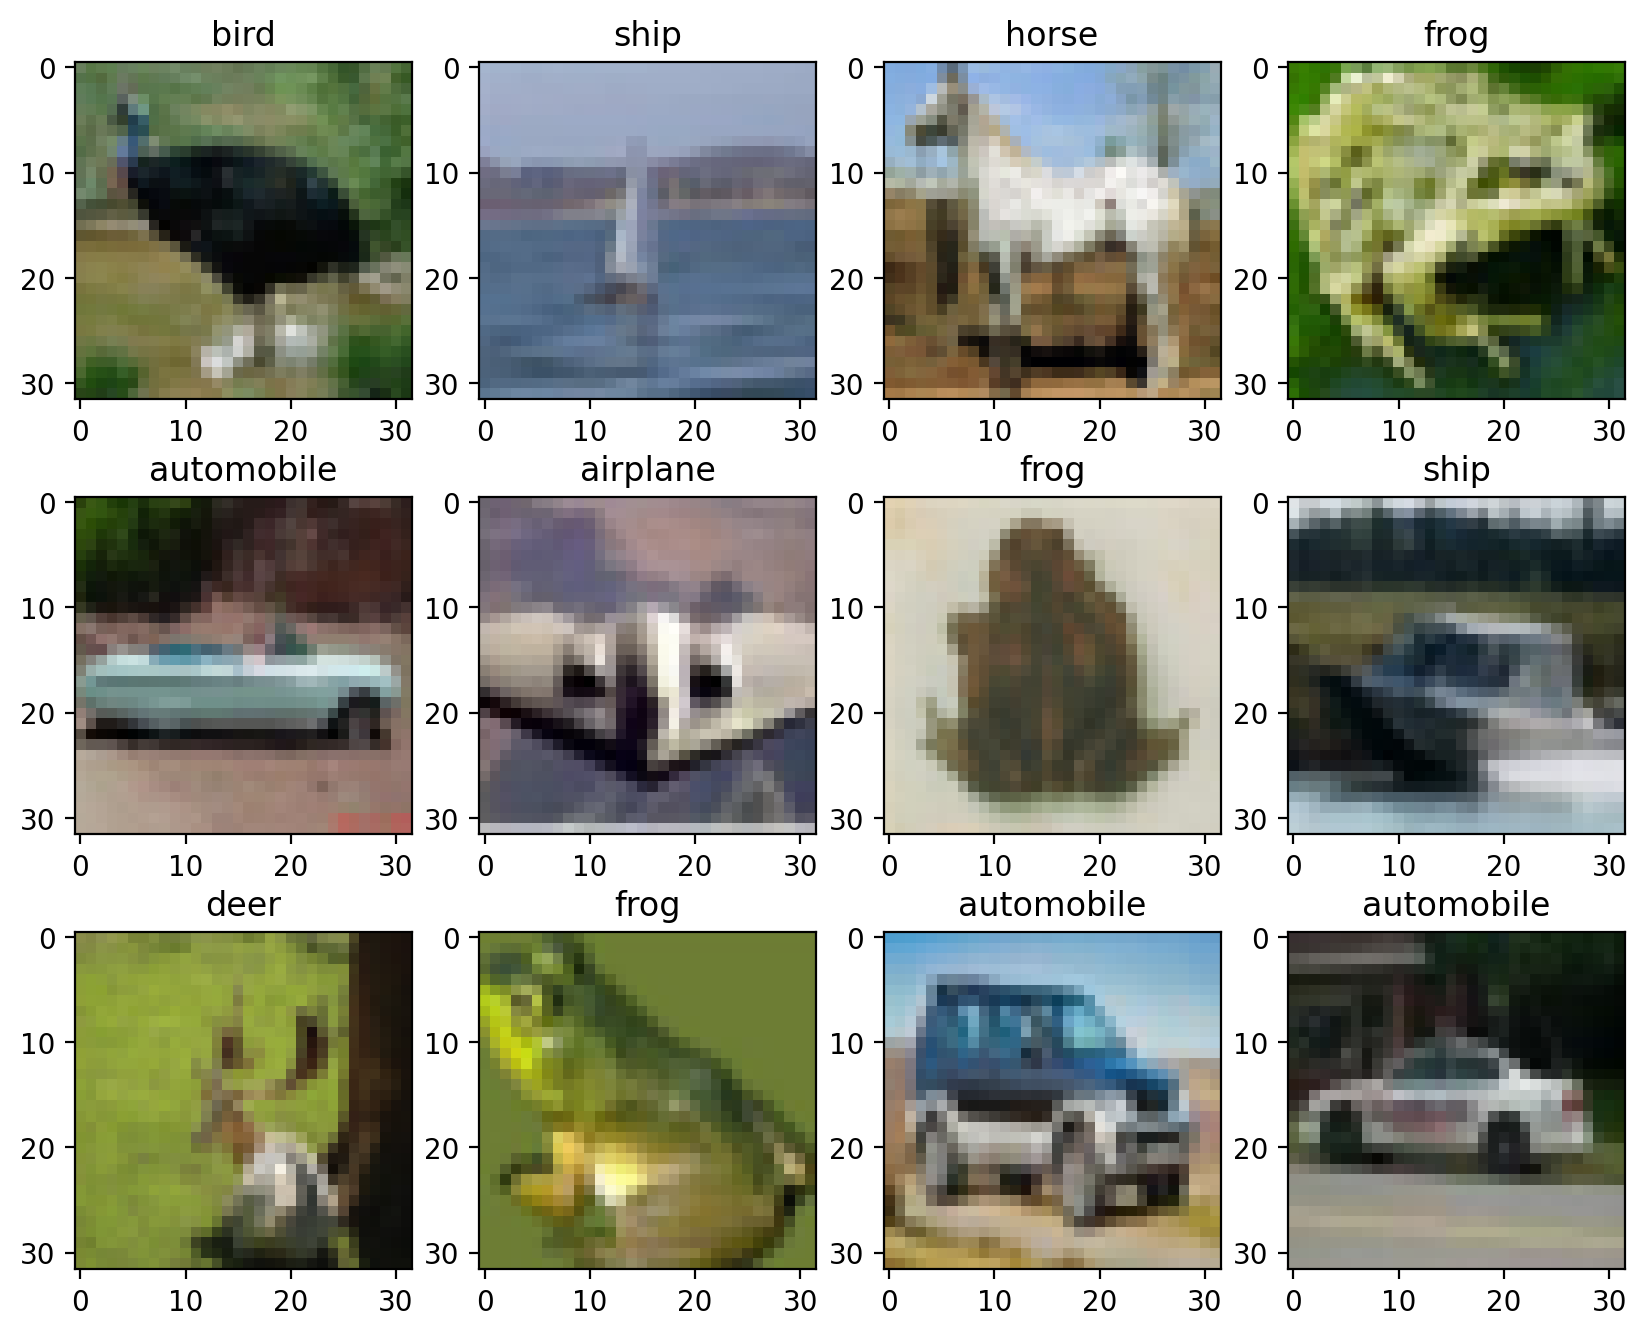

In [ ]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [ ]:
X_train = X_train.astype('int32')
X_test = X_test.astype('int32')

In [ ]:
# Normalizing the image pixels
# X_train_normalized = X_train/255
# X_test_normalized = X_test/255

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
#random state
np.random.seed(42)
random.seed(42)
set_seed(42)
#building fully connected ff model
model_base = Sequential()
model_base.add(Flatten(input_shape=(32,32,3))) #input layer
model_base.add(Dense(100, activation = 'relu')) #100 node hidden layer
model_base.add(Dense(10, activation='softmax')) #output layer
#compling model
model_base.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
#fitting model on training
history_base = model_base.fit(X_train,
                           y_train_cat,
                           validation_split=0.1,
                           batch_size=500,
                           epochs=10,
                           verbose = 1)
#scoring on test data
base_score = model_base.evaluate(X_test,
                                 y_test_cat,
                                 verbose = 1)
labels = model_base.metrics_names
#model performance
print(f'{labels[0]}: {base_score[0]}')
print(f'{labels[1]}: {base_score[1]}')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-22 14:21:30.384310: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-22 14:21:30.384332: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-22 14:21:30.384337: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-22 14:21:30.384354: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-22 14:21:30.384364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/tas

Epoch 1/10


2024-04-22 14:21:31.086230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1276 - loss: 158.9712 - val_accuracy: 0.0948 - val_loss: 2.3107
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1023 - loss: 2.3075 - val_accuracy: 0.0948 - val_loss: 2.3102
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1023 - loss: 2.3046 - val_accuracy: 0.0948 - val_loss: 2.3099
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1023 - loss: 2.3037 - val_accuracy: 0.0948 - val_loss: 2.3095
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1023 - loss: 2.3033 - val_accuracy: 0.0948 - val_loss: 2.3091
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1023 - loss: 2.3030 - val_accuracy: 0.0948 - val_loss: 2.3087
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1023 - loss: 2.3028 - val_accuracy: 0.0948 - val_loss: 2.3085
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1023 - loss: 2.3027 - val_accuracy: 0.0948 - val_loss: 

In [ ]:
#building model
early_stopping_1  = EarlyStopping(patience=2, restore_best_weights=True, verbose=1)

np.random.seed(42)
random.seed(42)
set_seed(42)

model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_1.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same')) # must add stride =(1,1) to have padding= same work,  because pooling (2,2) overrides the padding = same
model_1.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(10, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#fit model on training
history_1 = model_1.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                        batch_size=500, epochs=15, callbacks=early_stopping_1)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1543 - loss: 6.9504 - val_accuracy: 0.3068 - val_loss: 1.9019
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3319 - loss: 1.8337 - val_accuracy: 0.3991 - val_loss: 1.6691
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4105 - loss: 1.6283 - val_accuracy: 0.4421 - val_loss: 1.5493
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4521 - loss: 1.5183 - val_accuracy: 0.4756 - val_loss: 1.4729
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4843 - loss: 1.4353 - val_accuracy: 0.4902 - val_loss: 1.4227
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5102 - loss: 1.3676 - val_accuracy: 0.5064 - val_loss: 1.3844
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5310 - loss: 1.3109 - val_accuracy: 0.5263 - val_loss: 1.3451
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5519 - loss: 1.2615 - val_accu

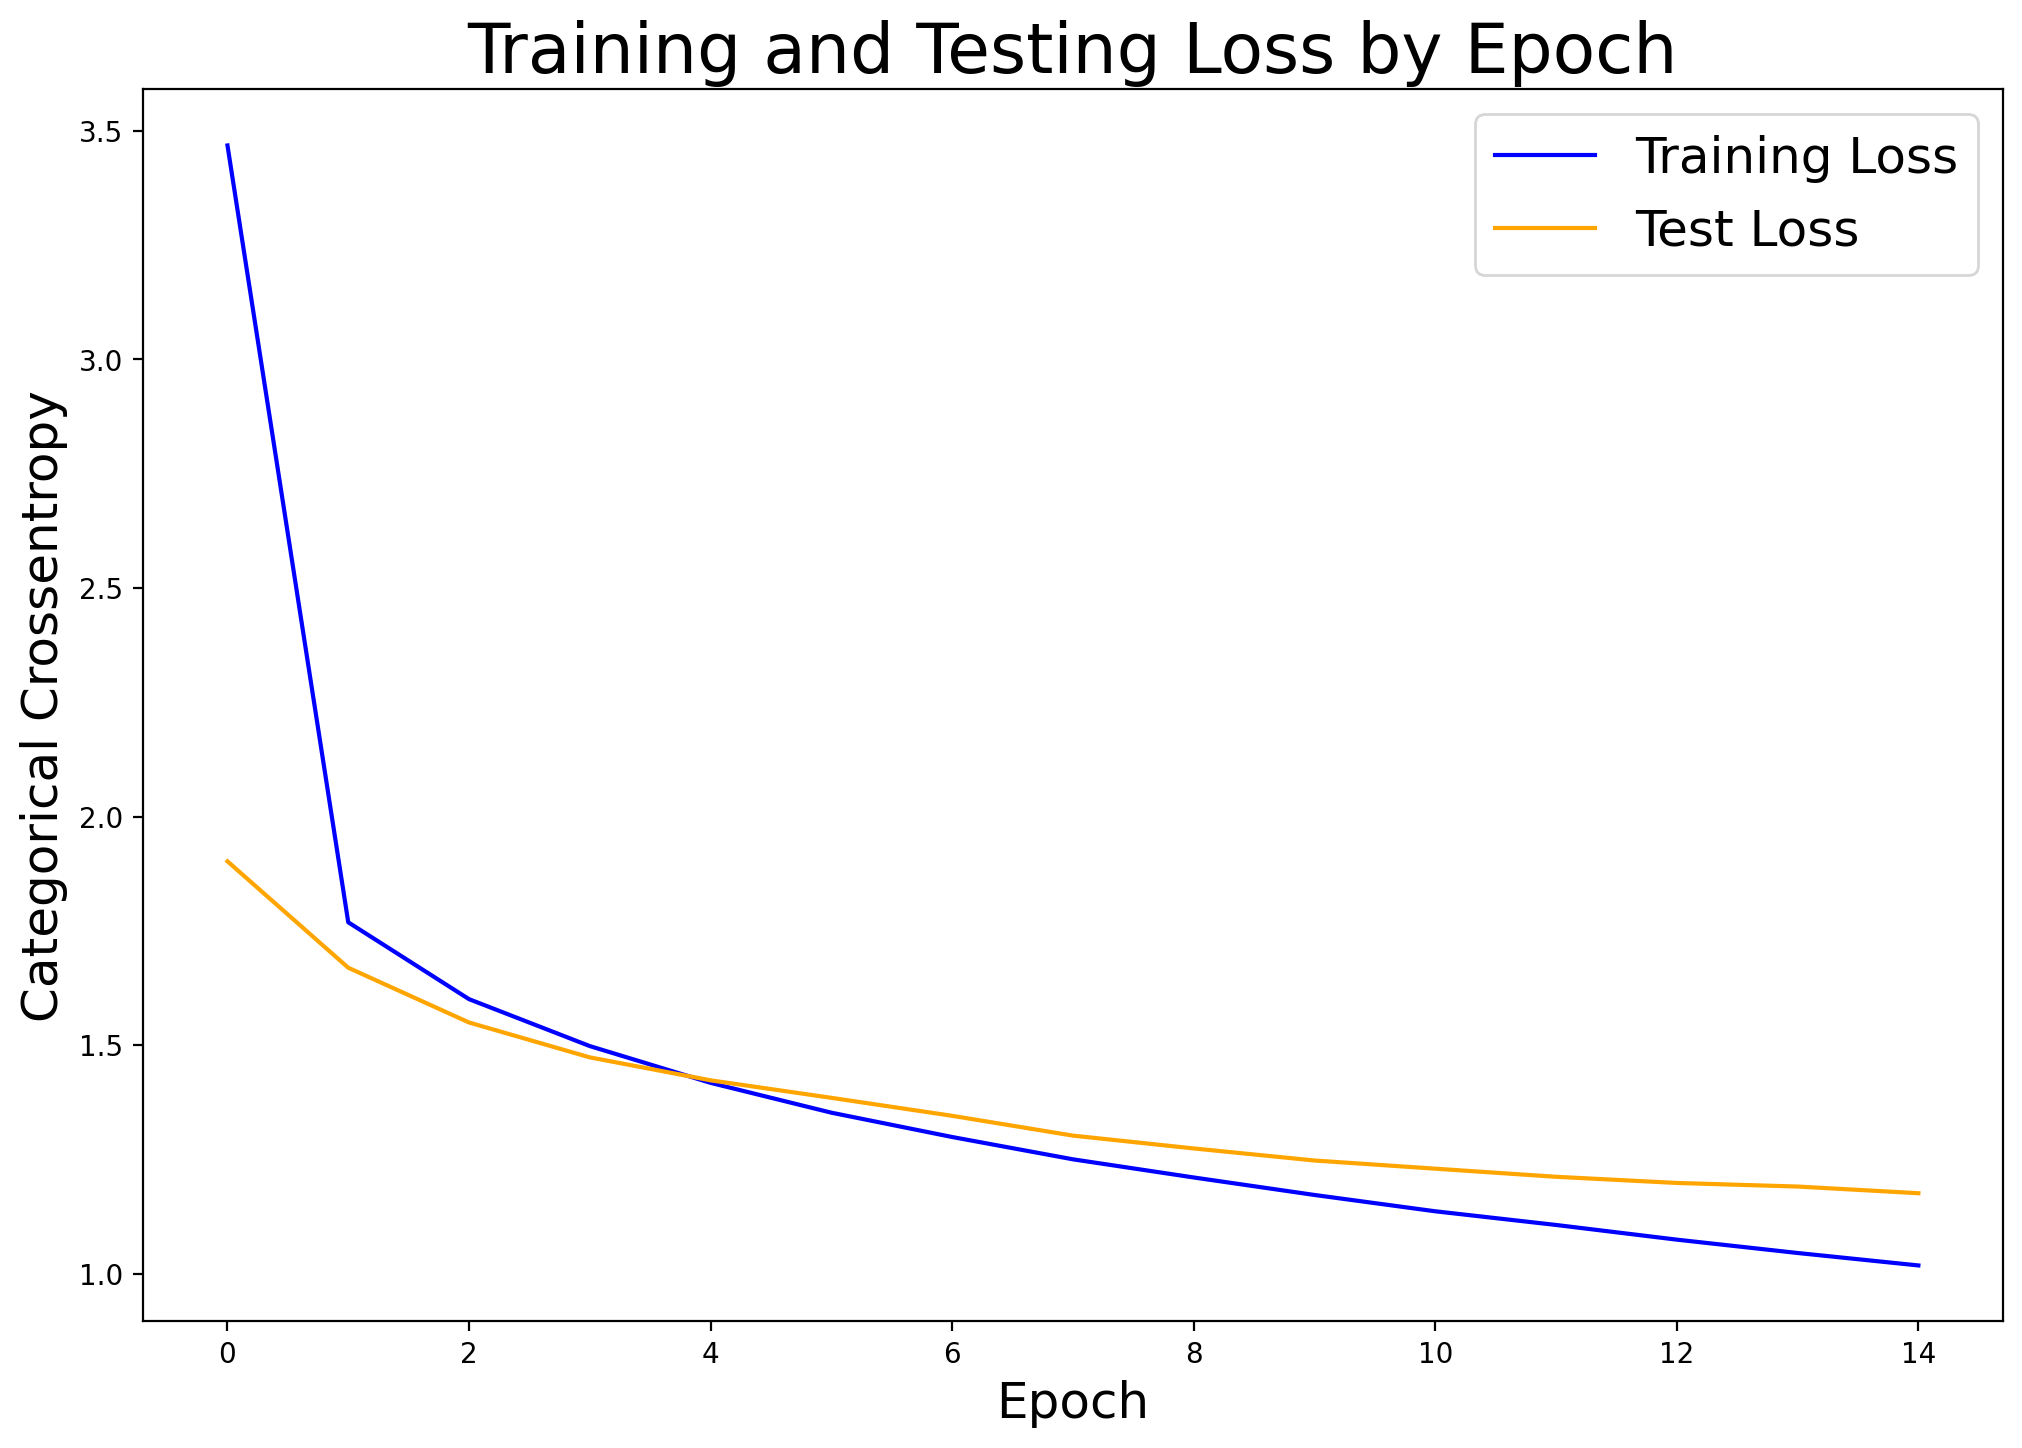

In [ ]:
train_loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

plt.figure(figsize=(12,8))

plt.plot(train_loss, label = 'Training Loss', color = 'blue')
plt.plot(test_loss, label = 'Test Loss', color = 'orange')

plt.title("Training and Testing Loss by Epoch", fontsize = 25)
plt.xlabel("Epoch", fontsize =18)
plt.ylabel("Categorical Crossentropy", fontsize = 18)

plt.legend(fontsize =18);

In [ ]:
# more model eval if we want
model_1.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5975 - loss: 1.1672


[1.1756919622421265, 0.5954999923706055]

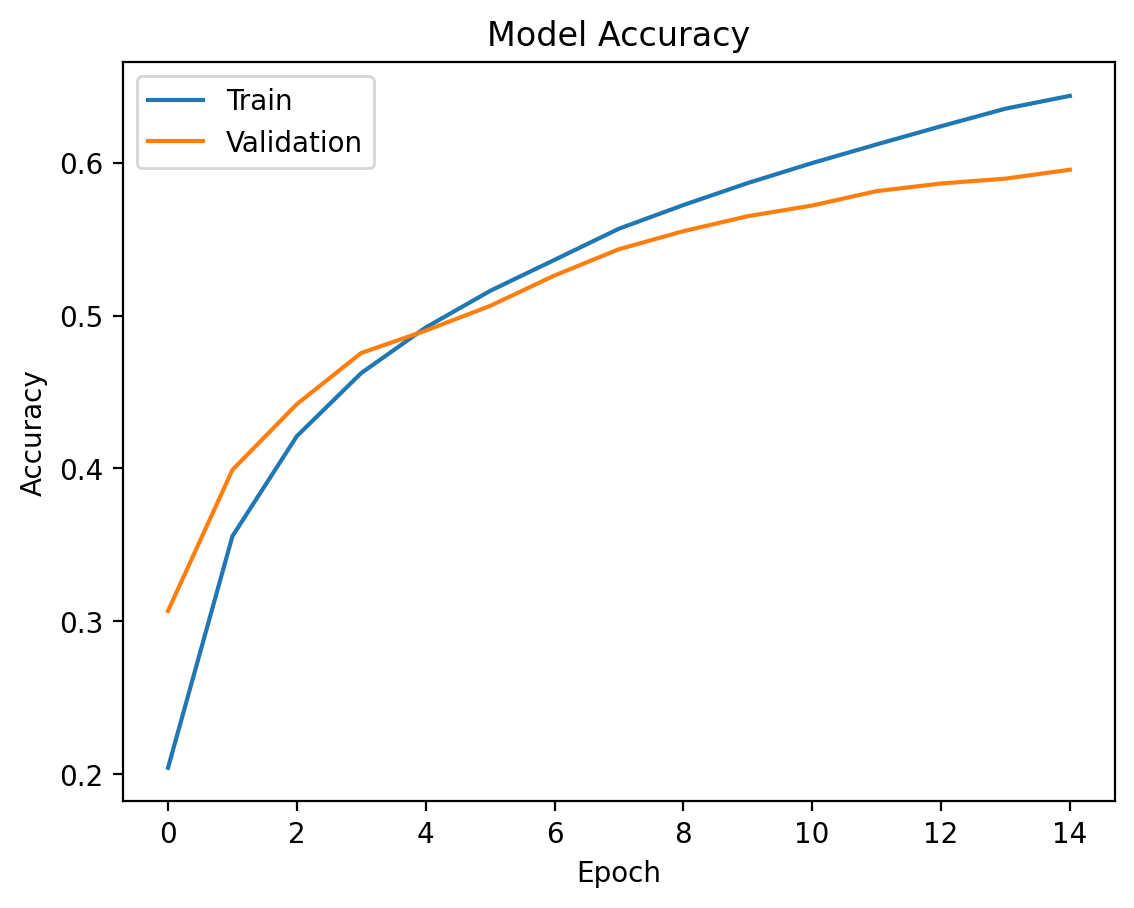

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Making predictions on the test data
y_pred_test = model_1.predict(X_test)

#Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.73      0.67      0.70      1000
           2       0.52      0.39      0.44      1000
           3       0.43      0.38      0.40      1000
           4       0.52      0.48      0.50      1000
           5       0.47      0.57      0.52      1000
           6       0.61      0.75      0.67      1000
           7       0.67      0.67      0.67      1000
           8       0.69      0.72      0.70      1000
           9       0.68      0.67      0.67      1000

    accuracy                           0.60     10000
   macro avg       0.59      0.60      0.59     10000
weighted avg       0.59      0.60      0.59     10000



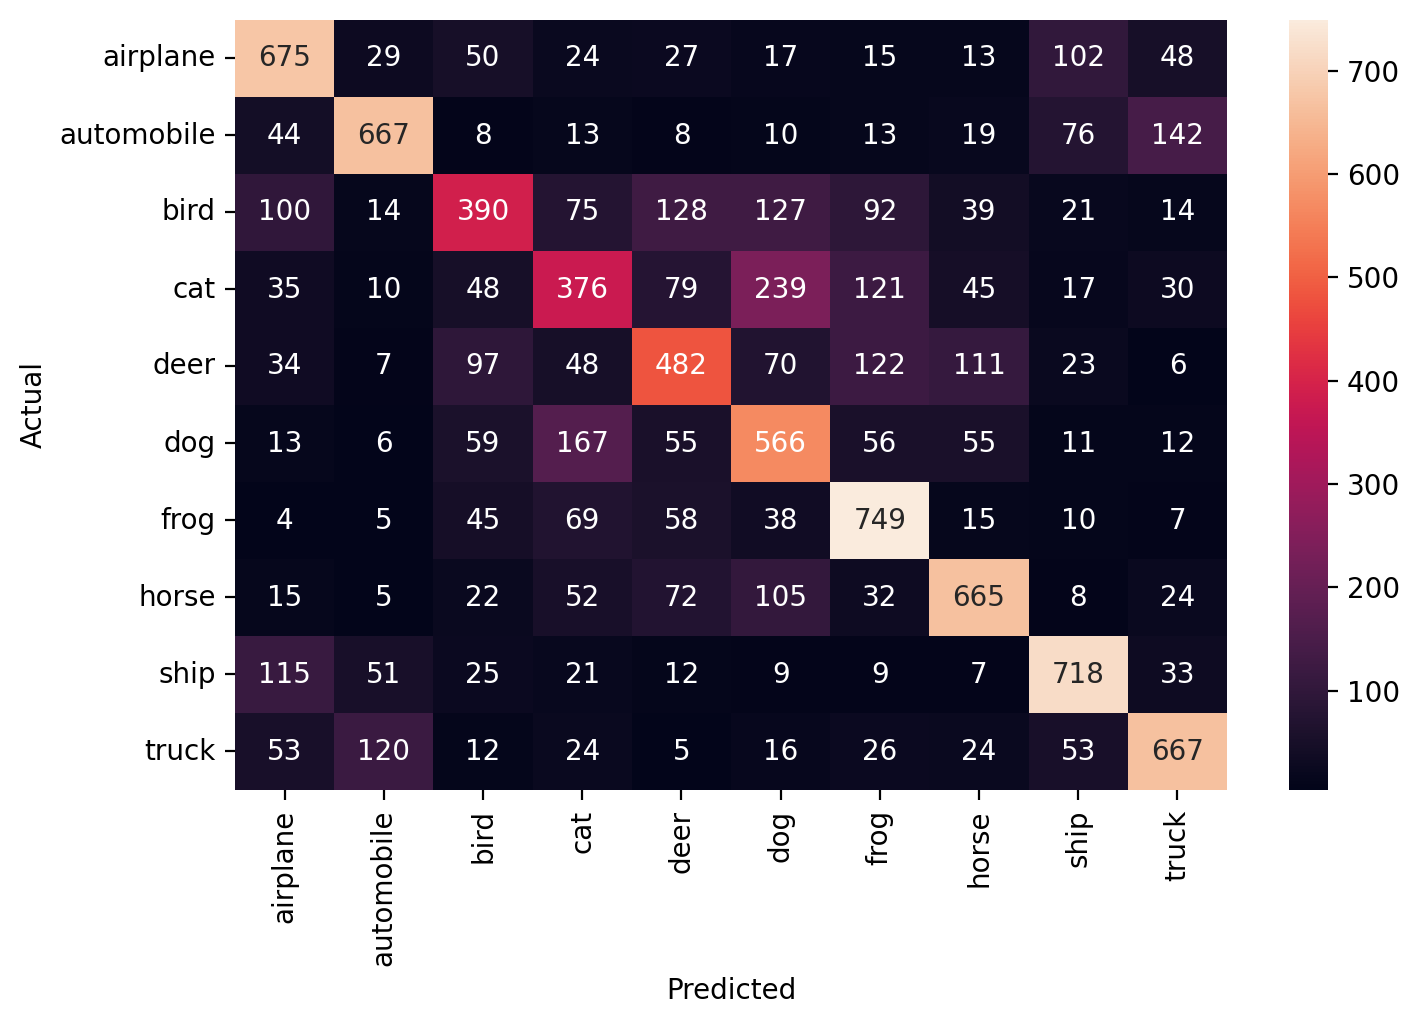

In [ ]:
#Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

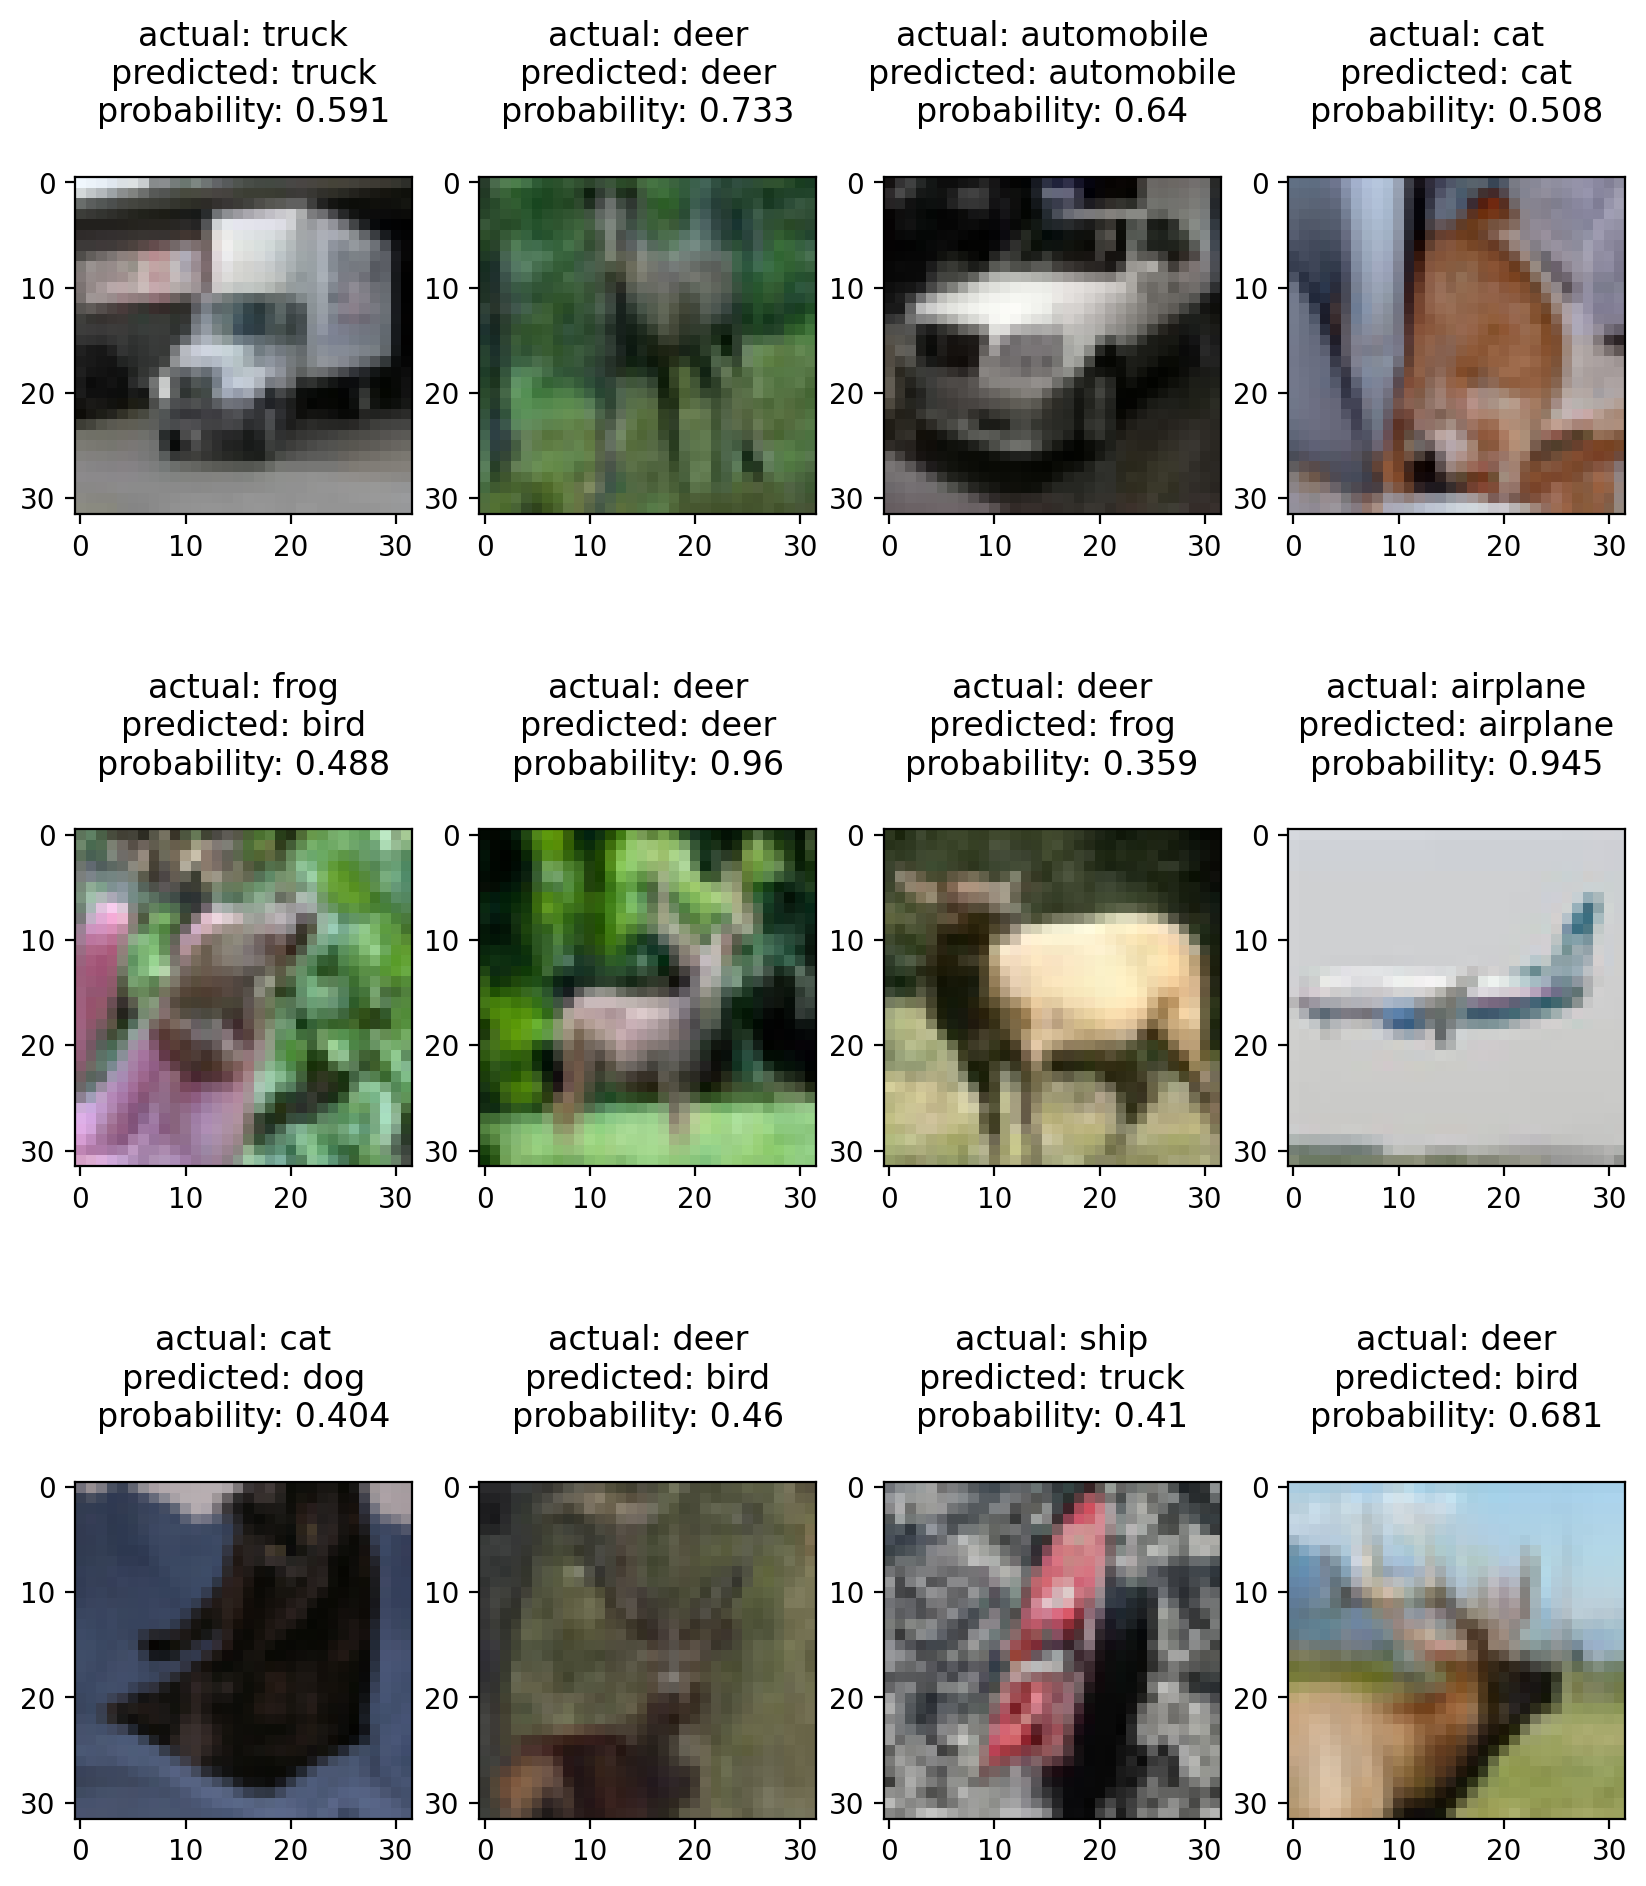

In [ ]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 12))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

In [ ]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(64, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(10, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_2 = model_2.fit(
            X_train, y_train_cat,
            epochs=10,
            validation_split=0.1
)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.2713 - loss: 1.9934 - val_accuracy: 0.4468 - val_loss: 1.4985
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.4582 - loss: 1.4868 - val_accuracy: 0.5346 - val_loss: 1.2811
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.5211 - loss: 1.3208 - val_accuracy: 0.5754 - val_loss: 1.1785
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.5707 - loss: 1.2025 - val_accuracy: 0.6066 - val_loss: 1.1338
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.5955 - loss: 1.1382 - val_accuracy: 0.6302 - val_loss: 1.0552
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.6156 - loss: 1.0831 - val_accuracy: 0.6292 - val_loss: 1.0659
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.6368 - loss: 1.0284 - val_accuracy: 0.6570 - val_loss: 1.0123
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.6466 -

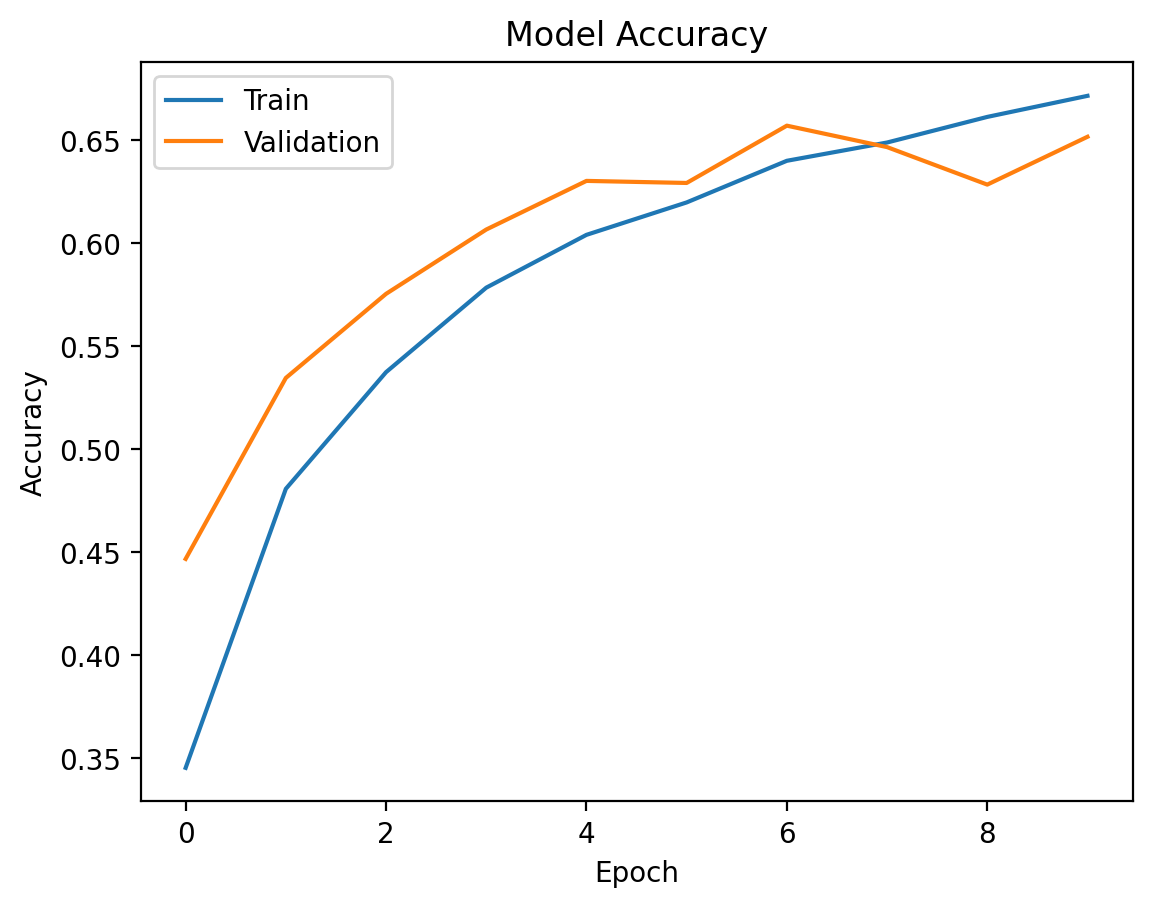

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(64, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(10, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
early_stopping_2  = EarlyStopping(patience=2, restore_best_weights=True, verbose=1)

history_2 = model_2.fit(
            X_train, y_train_cat,
            epochs=10,
            validation_data=(X_test, y_test_cat),
            callbacks = early_stopping_2
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.2546 - loss: 2.0582 - val_accuracy: 0.4714 - val_loss: 1.4818
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.4868 - loss: 1.4035 - val_accuracy: 0.5588 - val_loss: 1.2491
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5749 - loss: 1.1837 - val_accuracy: 0.6352 - val_loss: 1.0372
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6229 - loss: 1.0634 - val_accuracy: 0.6303 - val_loss: 1.0610
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6481 - loss: 1.0014 - val_accuracy: 0.6477 - val_loss: 1.0266
Epoch 6/10
 296/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.6696 - loss: 0.9539

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Making predictions on the test data
y_pred_test = model_2.predict(X_test)

#Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

#Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 12))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()